In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Обработка результатов

## **Изучение полученных результатов из УМ**

In [2]:
def get_result(config:str,
               way_type:str,
               fault:str,
               speed:int,
               profile:str = "gost") ->pd.DataFrame:
    """
    Получение результатов расчетов по ключевым словам
    1. `config` принимает два вида строк `empty` и `loaded`
    2. `way_type` принимает три вида строк `straight`, `curve_350` и `curve_650`
    3. `fault` принимает три вида строк `normal`, `polzun15`, `ellips10`
    4. `speed` от 10 до 60 км/ч
    5. `profile` есть профили `gost`, `newwagonw`, `greb_26`, `greb_30`, `greb_28`
    """
    dictionary = {"curve_350":{20:55,
                               30:39,
                               40:28,
                               50:24,
                               60:19},
                }
    if config == "empty":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\empty"
    
    elif config == "loaded":
        PATH = "C:\\Users\\Daniil\\Desktop\\simulation_results\\loaded"
    
    name = "\\"+config+"_"+way_type+"_"+fault+"_"+str(speed)+"_"+profile+".csv"

    l_name = len(name)

    FULL_PATH = PATH+name

    file = pd.read_csv(FULL_PATH,encoding='latin-1')

    COL_NAMES = ["time_step",name[1:l_name-4]]

    file.columns = COL_NAMES

    file = file.set_index("time_step")

    if config == "curve_350":
        file = file[file.index<dictionary["curve_350"][speed]]

    
    return file


In [3]:
def get_profile_results(config:str,
                        way_type:str,
                        fault:str,
                        speed:int):
    """Результаты расчета по всем видам профилей"""
    file1 = get_result(config, way_type,fault,speed)
    file2 = get_result(config, way_type,fault,speed, "greb_26")
    file3 = get_result(config, way_type,fault,speed, "greb_28")
    file4 = get_result(config, way_type,fault,speed, "greb_30")
    file5 = get_result(config, way_type,fault,speed, "newwagonw")

    return file1,file2,file3,file4,file5

In [4]:
def plot_profile_results(config:str,way_type:str,fault:str,speed:int):
    """Создание графика сравнения результатов с разным профилем колес"""
    d={"loaded":"Груженый",
       "empty":"Порожний",
       "straight":"прямая",
       "curve_350":"кривая 350 м",
       "curve_650":"кривая 650 м",
       "normal":"без неисправностей",
       "polzun15":"ползун",
       "ellips10":"неравномерный прокат"}
    
   #  sns.set (rc={' axes.facecolor':'#C0C0C0', 'figure.facecolor':'#FFFFF0 '})
    
    files = get_profile_results(config, way_type,fault,speed)
    FILE = pd.concat(files,axis=1)
    FILE.columns = ["gost","greb_26","greb_28","greb_30","newwagonw"]

    plt.figure(figsize=(12,8))
    plt.grid(True)
    sns.lineplot(FILE)
    plt.title(f"{d[config]} вагон, {d[way_type]}, {d[fault]} скорость {speed} км/ч ")
    plt.xlabel("Время, с")
    plt.ylabel("Вертикальная сила, Н")
    plt.show()
    



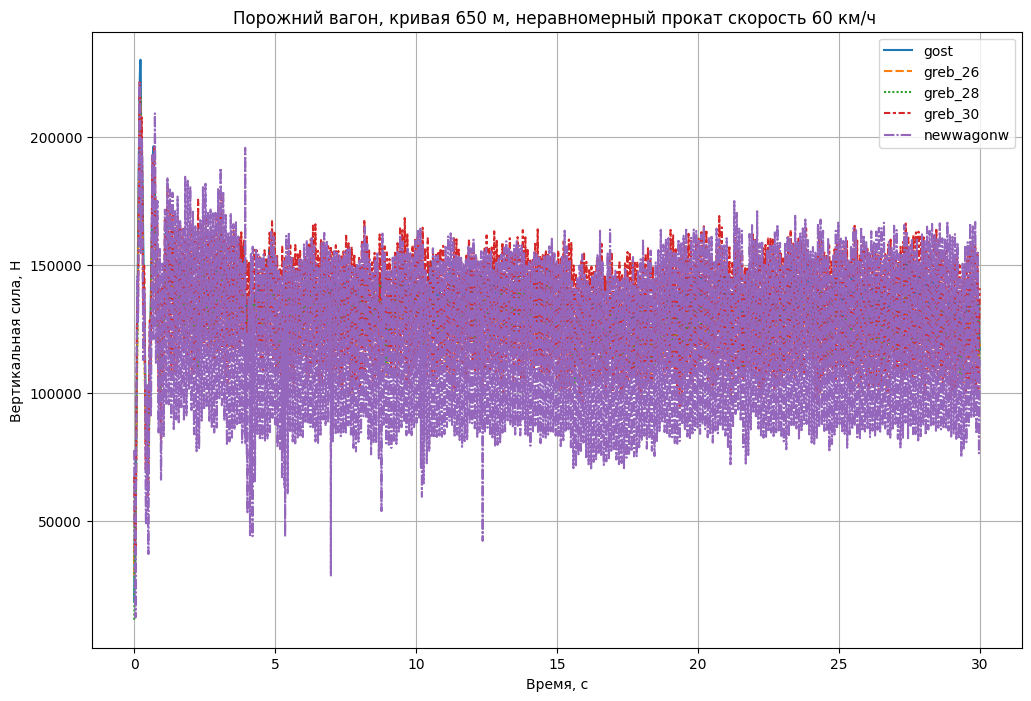

In [5]:
plot_profile_results("empty","curve_650","ellips10",60)

In [6]:
empty_straight_normal_10 = get_result("empty","straight","normal",10)
empty_straight_normal_10.head()

,empty_straight_normal_10_gost
time_step,
0.000000,29575.992
0.005109,32467.777
0.010109,35095.023
0.015109,38440.480
0.020109,41884.520


In [7]:
empty_straight_normal_20 = get_result("empty","straight","normal",20)
empty_straight_normal_20.head()

,empty_straight_normal_20_gost
time_step,
0.000000,29575.992
0.005109,32136.971
0.010109,35086.570
0.015109,39165.609
0.020109,43360.832


In [8]:
def get_speed_results(config:str,
                      way_type:str,
                      fault:str,
                      profile:str = "gost") -> list[pd.DataFrame]:
    speed = [i for i in range(10,70,10)]

    results = []

    for v in speed:
        file = get_result(config,way_type,fault,profile=profile,speed=v)
        results.append(file)
    
    return results

In [9]:
wagon_cfg = ["empty","loaded"]
way_cfg = ["straight","curve_350","curve_650"]

d = {}

for wagon in wagon_cfg:
    d[wagon] = {}
    for way in way_cfg:
        d[wagon][way] = 0

print(d)

{'empty': {'straight': 0, 'curve_350': 0, 'curve_650': 0}, 'loaded': {'straight': 0, 'curve_350': 0, 'curve_650': 0}}


In [10]:
wagon_cfg = ["empty","loaded"]
way_cfg = ["straight","curve_350","curve_650"]
wheel_cfg = ["gost", "greb_26","greb_28","greb_30","newwagonw"]
fault_cfg = ["normal","polzun15","ellips10"]

def get_full_calculations(wagon_cfg:list,
                          way_cfg:list,
                          wheel_cfg:list,
                          fault_cfg:list) -> dict:
    
    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}
        for way in way_cfg:
            gen_dict[wagon][way] = {}
            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                for wheel in wheel_cfg:
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = get_speed_results(wagon,way,fault,wheel)
    
    return gen_dict

In [11]:
ALL_CALCULATIONS = get_full_calculations(wagon_cfg,way_cfg,wheel_cfg,fault_cfg)

empty
straight
normal
gost
------
empty
straight
normal
greb_26
------
empty
straight
normal
greb_28
------
empty
straight
normal
greb_30
------
empty
straight
normal
newwagonw
------
empty
straight
polzun15
gost
------
empty
straight
polzun15
greb_26
------
empty
straight
polzun15
greb_28
------
empty
straight
polzun15
greb_30
------
empty
straight
polzun15
newwagonw
------
empty
straight
ellips10
gost
------
empty
straight
ellips10
greb_26
------
empty
straight
ellips10
greb_28
------
empty
straight
ellips10
greb_30
------
empty
straight
ellips10
newwagonw
------
empty
curve_350
normal
gost
------
empty
curve_350
normal
greb_26
------
empty
curve_350
normal
greb_28
------
empty
curve_350
normal
greb_30
------
empty
curve_350
normal
newwagonw
------
empty
curve_350
polzun15
gost
------
empty
curve_350
polzun15
greb_26
------
empty
curve_350
polzun15
greb_28
------
empty
curve_350
polzun15
greb_30
------
empty
curve_350
polzun15
newwagonw
------
empty
curve_350
ellips10
gost
------
emp

In [12]:
ALL_CALCULATIONS["loaded"]['straight']['ellips10']['gost']

[           loaded_straight_ellips10_10_gost
 time_step                                  
 0.000000                          18932.619
 0.005047                          24015.994
 0.010047                          32330.969
 0.015047                          40676.207
 0.020047                          45764.238
 ...                                     ...
 4.980047                         144712.160
 4.985047                         144815.590
 4.990047                         145342.860
 4.995047                         145668.580
 5.000047                         145938.560
 
 [1001 rows x 1 columns],
            loaded_straight_ellips10_20_gost
 time_step                                  
 0.000000                          18932.619
 0.005109                          24231.982
 0.010109                          33657.520
 0.015109                          43047.355
 0.020109                          48971.945
 ...                                     ...
 4.980109                  

## **Подготовка инфы для разделения на кастомные фолды**

Так как колесо по ГОСТ имеет радиус 475 мм, то полный оборот колеса fold = 2*pi*475

Тогда время прохождения полного оборота колеса будет равно t = fold/v 

In [13]:
def time_split(v:int) -> int:
    """Определение временного промежутка полного оборота колеса
    1. v - скорость движения поезда, км/ч
    """
    speed = v/3.6
    lenght = 2*np.pi*0.475
    t = lenght/speed
    return t

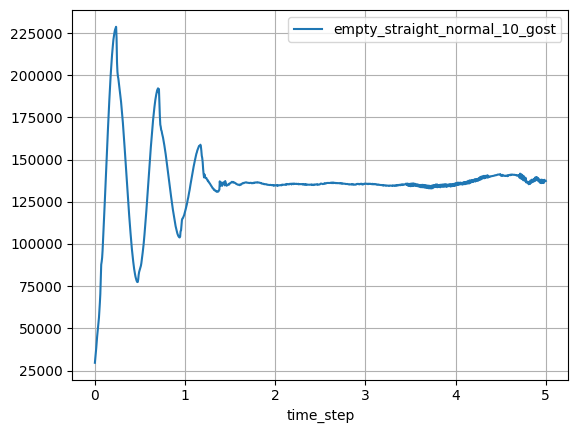

In [14]:
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS["empty"]["straight"]["normal"]["gost"][0])
plt.show()

In [15]:
def get_time_splits(data:pd.DataFrame) -> list:
    """Возвращает индексы по которым нужно производить обрез
    Индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = []

    start_point = 1.4

    time_max_point = data.index.max()               # Максимальное время

    if data.columns[0].split("_")[1] == "straight":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[3])) # 1.007 сек

    elif data.columns[0].split("_")[1] == "curve":
        col_name = data.columns[0].split("_")           # 10,20,30... км/ч
        wheel_rotate_num = time_split(int(col_name[4])) # 1.007 сек
        
    num_folds = (time_max_point-1)//wheel_rotate_num    # Сколько всего фолдов получится сделать

    res.append(start_point)

    for _ in range(int(num_folds)):
        start_point+= wheel_rotate_num
        res.append(start_point)

    return res

In [16]:
def time_indexes(frames:list[pd.DataFrame]) -> dict:
    """Возвращает словарь индексов по которым нужно производить обрез, где
    индексы высчтитываются в зависимости от скорости движения вагона и радиуса колеса"""
    
    res = {}

    for n in range(len(frames)):
        str = frames[n].columns[0].split("_")
        for s in str:
            if s.isdigit():
                if int(s) != 350 and int(s) != 650:
                    name = s

                    res[name] = get_time_splits(frames[n])
    
    return res

In [17]:
ti = time_indexes(ALL_CALCULATIONS["empty"]["straight"]["normal"]["gost"])

In [18]:
ti

{'10': [1.4, 2.4744246875277094, 3.5488493750554184, 4.6232740625831275],
 '20': [1.4,
  1.9372123437638544,
  2.474424687527709,
  3.0116370312915635,
  3.548849375055418,
  4.0860617188192725,
  4.6232740625831275,
  5.160486406346982],
 '30': [1.4,
  1.7581415625092363,
  2.1162831250184726,
  2.474424687527709,
  2.8325662500369453,
  3.1907078125461816,
  3.548849375055418,
  3.9069909375646543,
  4.265132500073891,
  4.6232740625831275,
  4.981415625092364,
  5.3395571876016],
 '40': [1.4,
  1.6686061718819272,
  1.9372123437638544,
  2.205818515645782,
  2.4744246875277094,
  2.743030859409637,
  3.0116370312915643,
  3.280243203173492,
  3.5488493750554193,
  3.817455546937347,
  4.086061718819274,
  4.354667890701202,
  4.623274062583129,
  4.891880234465057,
  5.160486406346984],
 '50': [1.4,
  1.6148849375055419,
  1.8297698750110838,
  2.0446548125166255,
  2.2595397500221672,
  2.474424687527709,
  2.6893096250332507,
  2.9041945625387924,
  3.119079500044334,
  3.33396443

In [19]:
for i in ti.keys():
    print(i)

10
20
30
40
50
60


In [20]:
def get_all_time_indexes(calculations:dict[dict[dict[dict[list[pd.DataFrame]]]]]) -> dict:
    

    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()


    gen_dict = {}
    

    for wagon in wagon_cfg:
        gen_dict[wagon] = {}

        for way in way_cfg:
            gen_dict[wagon][way] = {}

            for fault in fault_cfg:   
                gen_dict[wagon][way][fault] = {}
                
                for wheel in wheel_cfg:
                    print(f"{wagon}\n{way}\n{fault}\n{wheel}\n------")
                    gen_dict[wagon][way][fault][wheel] = time_indexes(calculations[wagon][way][fault][wheel])
    
    return gen_dict

ALL_TIME_INDEXES = get_all_time_indexes(ALL_CALCULATIONS)

empty
straight
normal
gost
------
empty
straight
normal
greb_26
------
empty
straight
normal
greb_28
------
empty
straight
normal
greb_30
------
empty
straight
normal
newwagonw
------
empty
straight
polzun15
gost
------
empty
straight
polzun15
greb_26
------
empty
straight
polzun15
greb_28
------
empty
straight
polzun15
greb_30
------
empty
straight
polzun15
newwagonw
------
empty
straight
ellips10
gost
------
empty
straight
ellips10
greb_26
------
empty
straight
ellips10
greb_28
------
empty
straight
ellips10
greb_30
------
empty
straight
ellips10
newwagonw
------
empty
curve_350
normal
gost
------
empty
curve_350
normal
greb_26
------
empty
curve_350
normal
greb_28
------
empty
curve_350
normal
greb_30
------
empty
curve_350
normal
newwagonw
------
empty
curve_350
polzun15
gost
------
empty
curve_350
polzun15
greb_26
------
empty
curve_350
polzun15
greb_28
------
empty
curve_350
polzun15
greb_30
------
empty
curve_350
polzun15
newwagonw
------
empty
curve_350
ellips10
gost
------
emp

In [21]:
ALL_TIME_INDEXES["empty"]["curve_350"]["normal"]["gost"]

{'10': [1.4,
  2.4744246875277094,
  3.5488493750554184,
  4.6232740625831275,
  5.6976987501108365,
  6.7721234376385455,
  7.8465481251662546,
  8.920972812693964,
  9.995397500221674,
  11.069822187749384,
  12.144246875277094,
  13.218671562804804,
  14.293096250332514,
  15.367520937860224,
  16.441945625387934,
  17.516370312915644,
  18.590795000443354,
  19.665219687971064,
  20.739644375498774,
  21.814069063026484,
  22.888493750554193,
  23.962918438081903,
  25.037343125609613,
  26.111767813137323,
  27.186192500665033,
  28.260617188192743,
  29.335041875720453,
  30.409466563248163,
  31.483891250775873,
  32.55831593830358,
  33.63274062583129,
  34.707165313359,
  35.78159000088671,
  36.85601468841442,
  37.93043937594213,
  39.00486406346984,
  40.07928875099755,
  41.15371343852526,
  42.22813812605297,
  43.30256281358068,
  44.37698750110839,
  45.4514121886361,
  46.52583687616381,
  47.60026156369152,
  48.67468625121923,
  49.74911093874694,
  50.82353562627465

In [22]:
def get_splited_dataframe(data:pd.DataFrame,indexes:list) -> pd.DataFrame:
    """Разделение одного результата расчета на несколько других по полному обороту колеса
    1. `data` - датафрейм с расчетом
    2. `indexes` - индексы по которым нужно делить расчет"""
    
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    for i in range(len(indexes)):
        if i < len(indexes) - 1:
            seq = data[(data.index>=indexes[i]) & (data.index<=indexes[i+1])]  # срез по точкам
        else:
            seq = data[data.index>indexes[i]]
        common_df = pd.concat([common_df,seq], axis=1)
    
    df = common_df.drop(0, axis=1)
    num_cols = len(df.columns)

    df.columns = [[data.columns[0] for i in range(num_cols)],[i for i in range(num_cols)]]
    
    return df       

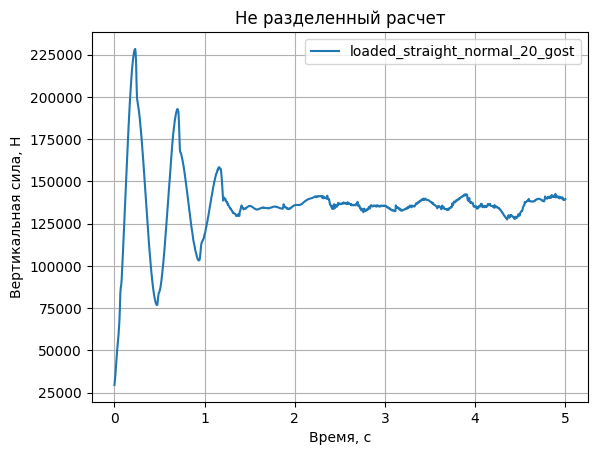

In [23]:
plt.grid(True)
sns.lineplot(ALL_CALCULATIONS["loaded"]["straight"]["normal"]["gost"][1])
plt.title("Не разделенный расчет")
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.show()

**Пример разделения расчета на несколько мелких по обороту колеса**

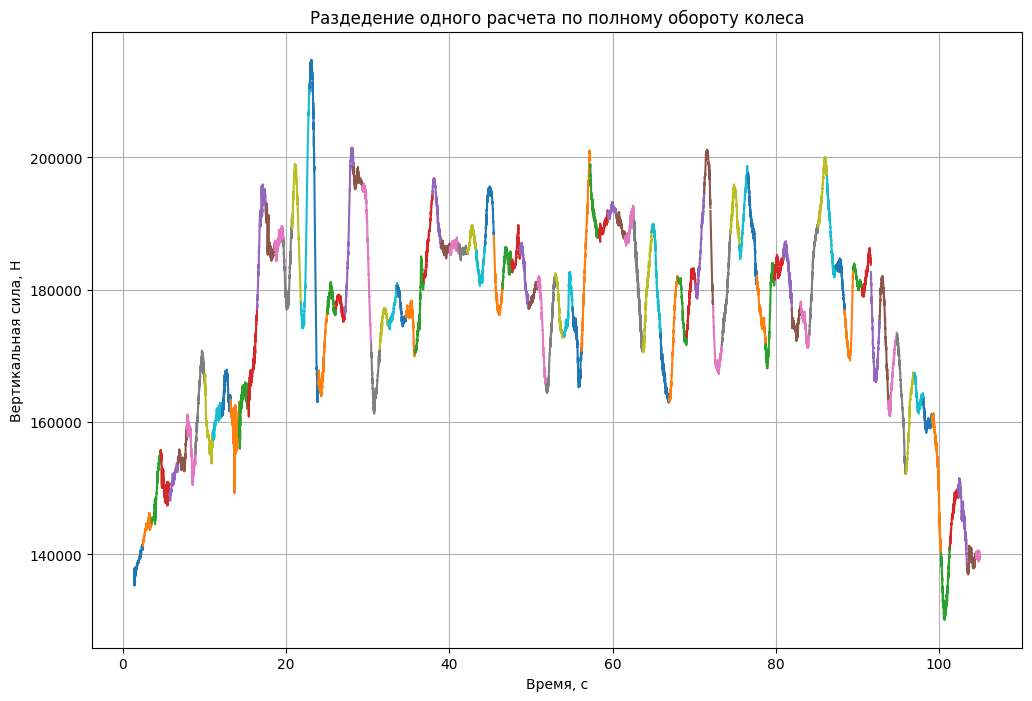

In [24]:
devided_result = get_splited_dataframe(ALL_CALCULATIONS["loaded"]["curve_350"]["normal"]["gost"][0],
                                       ALL_TIME_INDEXES["loaded"]["curve_350"]["normal"]["gost"]["10"])

devided_result_ = get_splited_dataframe(ALL_CALCULATIONS["loaded"]["curve_650"]["normal"]["gost"][0],
                                       ALL_TIME_INDEXES["loaded"]["curve_650"]["normal"]["gost"]["10"])

plt.figure().set_size_inches(12,8)
plt.grid(True)
plt.plot(devided_result)
plt.ylabel("Вертикальная сила, Н")
plt.xlabel("Время, с")
plt.title("Раздедение одного расчета по полному обороту колеса")
plt.show()

In [25]:
pd.concat([devided_result,devided_result_],axis=1)

loaded_curve_350_normal_10_gost                                  \
                                       0   1   2   3   4   5   6   7   8     
0.000000                               NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1.000000                               NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1.400047                         136376.66 NaN NaN NaN NaN NaN NaN NaN NaN   
1.400172                               NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1.405047                         135812.97 NaN NaN NaN NaN NaN NaN NaN NaN   
...                                    ...  ..  ..  ..  ..  ..  ..  ..  ..   
209.000000                             NaN NaN NaN NaN NaN NaN NaN NaN NaN   
210.000000                             NaN NaN NaN NaN NaN NaN NaN NaN NaN   
211.000000                             NaN NaN NaN NaN NaN NaN NaN NaN NaN   
212.000000                             NaN NaN NaN NaN NaN NaN NaN NaN NaN   
213.000000                             NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                ... loaded_curve_650_normal_10_gost                          \
           9    ...                             101 102 103 104 105 106 107   
0.000000   NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
1.000000   NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
1.400047   NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
1.400172   NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
1.405047   NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
...         ..  ...                             ...  ..  ..  ..  ..  ..  ..   
209.000000 NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
210.000000 NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
211.000000 NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
212.000000 NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   
213.000000 NaN  ...                             NaN NaN NaN NaN NaN NaN NaN   

                        
           108 109 110  
0.000000   NaN NaN NaN  
1.000000   NaN NaN NaN  
1.400047   NaN NaN NaN  
1.400172   NaN NaN NaN  
1.405047   NaN NaN NaN  
...         ..  ..  ..  
209.000000 NaN NaN NaN  
210.000000 NaN NaN NaN  
211.000000 NaN NaN NaN  
212.000000 NaN NaN NaN  
213.000000 NaN NaN NaN  

[31934 rows x 208 columns]

In [26]:
def make_frame_from_splits(calculations:dict,time_indexes:dict) -> pd.DataFrame:
    
    wagon_cfg = calculations.keys()
    way_cfg = calculations["empty"].keys()
    fault_cfg = calculations["empty"]["straight"].keys()
    wheel_cfg = calculations["empty"]["straight"]["normal"].keys()
    speed_cfg = time_indexes["empty"]["straight"]["normal"]["gost"].keys()
    lenght = len(calculations["empty"]["straight"]["normal"]["gost"])
    
    zeros = np.zeros((214,1))
    common_df = pd.DataFrame(zeros)

    n = 0

    for wagon in wagon_cfg:
        for way in way_cfg:
            for fault in fault_cfg:
                for wheel in wheel_cfg:
                    for l,speed in zip(range(lenght),speed_cfg):
                        
                        splitted_df = get_splited_dataframe(calculations[wagon][way][fault][wheel][l],
                                                            time_indexes[wagon][way][fault][wheel][speed])
                        
                        common_df = pd.concat([common_df,splitted_df], axis=1)
                        print(f"Выполнено объединений {n}")
                        n +=1
    
    df = common_df.drop(0, axis=1)

    return df                   

**Надо придумать различные фичи для сигнала**

In [44]:
import numpy as np

def max_frequency(array:pd.DataFrame) -> float:

    sample_rate = 100  # Пример частоты дискретизации (герц)

    # Применяем преобразование Фурье
    fourier_transform = np.fft.fft(array.to_numpy())

    # Вычисляем частоты
    n = len(array)
    freq = np.fft.fftfreq(n, d=1/sample_rate)

    # Находим индекс максимальной амплитуды в преобразовании Фурье
    max_amplitude_index = np.argmax(np.abs(fourier_transform))
    # Соответствующая частота к этому индексу
    frequency = freq[max_amplitude_index]
    return frequency
    
freq = max_frequency(ALL_CALCULATIONS["empty"]["straight"]["polzun15"]["greb_28"][0])

In [43]:
test = ALL_CALCULATIONS["empty"]["straight"]["polzun15"]["greb_28"][0].describe()

,loaded_curve_350_polzun15_10_gost
time_step,
0.000000,0.861775
0.005109,-0.022371
0.010109,-0.205686
0.015109,0.753285
0.020109,-0.675619
...,...
104.980230,0.911594
104.985240,0.323645
104.990230,0.199772


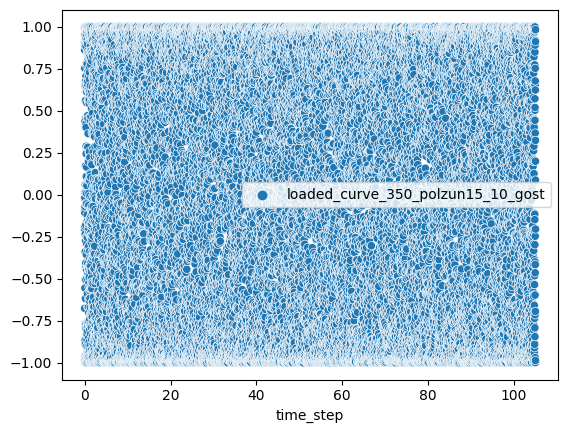

In [73]:
from scipy import integrate

def f(vec:pd.DataFrame):
    sns.scatterplot(np.sin(vec))
    return np.sin(vec)

f(ALL_CALCULATIONS["loaded"]["curve_350"]["polzun15"]["gost"][0])

# def get_integral(array:pd.DataFrame):

#     integral = integrate.quad(f,array.index[0],array.index[-1])
#     return integral

# get_integral(ALL_CALCULATIONS["loaded"]["curve_350"]["polzun15"]["gost"][0])

In [57]:
pd.concat([test,pd.DataFrame({"empty_straight_polzun15_10_greb_28":[freq]},index=["max_freq"])],axis=0)

,empty_straight_polzun15_10_greb_28
count,1001.000000
mean,124723.483413
std,21268.819953
min,18553.906000
25%,122586.380000
50%,123712.580000
75%,126955.730000
max,218431.420000
max_freq,4.595405


**Идея с преобразованием Фурье, как доп фичи**

In [ ]:
# Все разделенные расчеты
# Много кода по обработке каждого расчета
# ...

**Описание данных фолдов**

In [ ]:
loaded_calculations = [loaded_straight_normal_gost,
                       loaded_straight_normal_greb_26,
                       loaded_straight_normal_greb_28,
                       loaded_straight_normal_greb_30,
                       loaded_curve_350_normal_gost,
                       loaded_curve_350_normal_greb_26,
                       loaded_curve_350_normal_greb_28,
                       loaded_curve_350_normal_greb_30,
                       loaded_curve_650_normal_gost,
                       loaded_curve_650_normal_greb_26,
                       loaded_curve_650_normal_greb_28,
                       loaded_curve_650_normal_greb_30,
                       loaded_straight_polzun15_gost,
                       loaded_straight_polzun15_greb_26,
                       loaded_straight_polzun15_greb_28,
                       loaded_straight_polzun15_greb_30,
                       loaded_curve_350_polzun15_gost,
                       loaded_curve_350_polzun15_greb_26,
                       loaded_curve_350_polzun15_greb_28,
                       loaded_curve_350_polzun15_greb_30,
                       loaded_curve_650_polzun15_gost,
                       loaded_curve_650_polzun15_greb_26,
                       loaded_curve_650_polzun15_greb_28,
                       loaded_curve_650_polzun15_greb_30,
                       loaded_straight_ellips10_gost,
                       loaded_straight_ellips10_greb_26,
                       loaded_straight_ellips10_greb_28,
                       loaded_straight_ellips10_greb_30,
                       loaded_curve_350_ellips10_gost,
                       loaded_curve_350_ellips10_greb_26,
                       loaded_curve_350_ellips10_greb_28,
                       loaded_curve_350_ellips10_greb_30,
                       loaded_curve_650_ellips10_gost,
                       loaded_curve_650_ellips10_greb_26,
                       loaded_curve_650_ellips10_greb_28,
                       loaded_curve_650_ellips10_greb_30]

empty_calculations = [empty_straight_normal_gost,
                       empty_straight_normal_greb_26,
                       empty_straight_normal_greb_28,
                       empty_straight_normal_greb_30,
                       empty_curve_350_normal_gost,
                       empty_curve_350_normal_greb_26,
                       empty_curve_350_normal_greb_28,
                       empty_curve_350_normal_greb_30,
                       empty_curve_650_normal_gost,
                       empty_curve_650_normal_greb_26,
                       empty_curve_650_normal_greb_28,
                       empty_curve_650_normal_greb_30,
                       empty_straight_polzun15_gost,
                       empty_straight_polzun15_greb_26,
                       empty_straight_polzun15_greb_28,
                       empty_straight_polzun15_greb_30,
                       empty_curve_350_polzun15_gost,
                       empty_curve_350_polzun15_greb_26,
                       empty_curve_350_polzun15_greb_28,
                       empty_curve_350_polzun15_greb_30,
                       empty_curve_650_polzun15_gost,
                       empty_curve_650_polzun15_greb_26,
                       empty_curve_650_polzun15_greb_28,
                       empty_curve_650_polzun15_greb_30,
                       empty_straight_ellips10_gost,
                       empty_straight_ellips10_greb_26,
                       empty_straight_ellips10_greb_28,
                       empty_straight_ellips10_greb_30,
                       empty_curve_350_ellips10_gost,
                       empty_curve_350_ellips10_greb_26,
                       empty_curve_350_ellips10_greb_28,
                       empty_curve_350_ellips10_greb_30,
                       empty_curve_650_ellips10_gost,
                       empty_curve_650_ellips10_greb_26,
                       empty_curve_650_ellips10_greb_28,
                       empty_curve_650_ellips10_greb_30]

loaded_indexes = [indexes_loaded_straight_normal_gost,
                    indexes_loaded_straight_normal_greb_26,
                    indexes_loaded_straight_normal_greb_28,
                    indexes_loaded_straight_normal_greb_30,
                    indexes_loaded_curve_350_normal_gost,
                    indexes_loaded_curve_350_normal_greb_26,
                    indexes_loaded_curve_350_normal_greb_28,
                    indexes_loaded_curve_350_normal_greb_30,
                    indexes_loaded_curve_650_normal_gost,
                    indexes_loaded_curve_650_normal_greb_26,
                    indexes_loaded_curve_650_normal_greb_28,
                    indexes_loaded_curve_650_normal_greb_30,
                    indexes_loaded_straight_polzun15_gost,
                    indexes_loaded_straight_polzun15_greb_26,
                    indexes_loaded_straight_polzun15_greb_28,
                    indexes_loaded_straight_polzun15_greb_30,
                    indexes_loaded_curve_350_polzun15_gost,
                    indexes_loaded_curve_350_polzun15_greb_26,
                    indexes_loaded_curve_350_polzun15_greb_28,
                    indexes_loaded_curve_350_polzun15_greb_30,
                    indexes_loaded_curve_650_polzun15_gost,
                    indexes_loaded_curve_650_polzun15_greb_26,
                    indexes_loaded_curve_650_polzun15_greb_28,
                    indexes_loaded_curve_650_polzun15_greb_30,
                    indexes_loaded_straight_ellips10_gost,
                    indexes_loaded_straight_ellips10_greb_26,
                    indexes_loaded_straight_ellips10_greb_28,
                    indexes_loaded_straight_ellips10_greb_30,
                    indexes_loaded_curve_350_ellips10_gost,
                    indexes_loaded_curve_350_ellips10_greb_26,
                    indexes_loaded_curve_350_ellips10_greb_28,
                    indexes_loaded_curve_350_ellips10_greb_30,
                    indexes_loaded_curve_650_ellips10_gost,
                    indexes_loaded_curve_650_ellips10_greb_26,
                    indexes_loaded_curve_650_ellips10_greb_28,
                    indexes_loaded_curve_650_ellips10_greb_30]

empty_indexes = [indexes_empty_straight_normal_gost,
                    indexes_empty_straight_normal_greb_26,
                    indexes_empty_straight_normal_greb_28,
                    indexes_empty_straight_normal_greb_30,
                    indexes_empty_curve_350_normal_gost,
                    indexes_empty_curve_350_normal_greb_26,
                    indexes_empty_curve_350_normal_greb_28,
                    indexes_empty_curve_350_normal_greb_30,
                    indexes_empty_curve_650_normal_gost,
                    indexes_empty_curve_650_normal_greb_26,
                    indexes_empty_curve_650_normal_greb_28,
                    indexes_empty_curve_650_normal_greb_30,
                    indexes_empty_straight_polzun15_gost,
                    indexes_empty_straight_polzun15_greb_26,
                    indexes_empty_straight_polzun15_greb_28,
                    indexes_empty_straight_polzun15_greb_30,
                    indexes_empty_curve_350_polzun15_gost,
                    indexes_empty_curve_350_polzun15_greb_26,
                    indexes_empty_curve_350_polzun15_greb_28,
                    indexes_empty_curve_350_polzun15_greb_30,
                    indexes_empty_curve_650_polzun15_gost,
                    indexes_empty_curve_650_polzun15_greb_26,
                    indexes_empty_curve_650_polzun15_greb_28,
                    indexes_empty_curve_650_polzun15_greb_30,
                    indexes_empty_straight_ellips10_gost,
                    indexes_empty_straight_ellips10_greb_26,
                    indexes_empty_straight_ellips10_greb_28,
                    indexes_empty_straight_ellips10_greb_30,
                    indexes_empty_curve_350_ellips10_gost,
                    indexes_empty_curve_350_ellips10_greb_26,
                    indexes_empty_curve_350_ellips10_greb_28,
                    indexes_empty_curve_350_ellips10_greb_30,
                    indexes_empty_curve_650_ellips10_gost,
                    indexes_empty_curve_650_ellips10_greb_26,
                    indexes_empty_curve_650_ellips10_greb_28,
                    indexes_empty_curve_650_ellips10_greb_30]

In [ ]:
devided_result_1 = get_splited_dataframe(loaded_straight_normal_gost[1], indexes_loaded_straight_normal_gost["loaded_straight_normal_20_gost"])
devided_result_2 = get_splited_dataframe(loaded_curve_350_normal_gost[2], indexes_loaded_curve_350_normal_gost["loaded_curve_350_normal_30_gost"])

pd.concat([devided_result_1, devided_result_2], axis=1)

In [ ]:
def make_solid_frame(calculations:list[list[pd.DataFrame]], indexes:list[dict]):
    """Объединяет все разделенные расчеты (через `get_splited_dataframe`) в общий фрейм
    1. calculations - набор расчетов
    2. indexes - индексы по которым разделяем расчеты
    """
    
    key = calculations[0][0].columns
    df = get_splited_dataframe(calculations[0][0],indexes[key])
    
    for i in range(len(calculations)):
        for m in range(len(calculations[i])):
            key = calculations[i][m].columns
            frist_part_df = get_splited_dataframe(calculations[i][m],indexes[key])
            df = pd.concat([df, frist_part_df], axis=1)

    return df

In [ ]:
make_solid_frame(loaded_calculations,loaded_indexes)

# Пайплайн для обучения первой модельки 

*Предварительные результаты*

In [ ]:
loaded_calculations = [loaded_straight_normal_gost,
                       loaded_straight_normal_greb_26,
                       loaded_straight_normal_greb_28,
                       loaded_straight_normal_greb_30,
                       loaded_curve_350_normal_gost,
                       loaded_curve_350_normal_greb_26,
                       loaded_curve_350_normal_greb_28,
                       loaded_curve_350_normal_greb_30,
                       loaded_curve_650_normal_gost,
                       loaded_curve_650_normal_greb_26,
                       loaded_curve_650_normal_greb_28,
                       loaded_curve_650_normal_greb_30,
                       loaded_straight_polzun15_gost,
                       loaded_straight_polzun15_greb_26,
                       loaded_straight_polzun15_greb_28,
                       loaded_straight_polzun15_greb_30,
                       loaded_curve_350_polzun15_gost,
                       loaded_curve_350_polzun15_greb_26,
                       loaded_curve_350_polzun15_greb_28,
                       loaded_curve_350_polzun15_greb_30,
                       loaded_curve_650_polzun15_gost,
                       loaded_curve_650_polzun15_greb_26,
                       loaded_curve_650_polzun15_greb_28,
                       loaded_curve_650_polzun15_greb_30,
                       loaded_straight_ellips10_gost,
                       loaded_straight_ellips10_greb_26,
                       loaded_straight_ellips10_greb_28,
                       loaded_straight_ellips10_greb_30,
                       loaded_curve_350_ellips10_gost,
                       loaded_curve_350_ellips10_greb_26,
                       loaded_curve_350_ellips10_greb_28,
                       loaded_curve_350_ellips10_greb_30,
                       loaded_curve_650_ellips10_gost,
                       loaded_curve_650_ellips10_greb_26,
                       loaded_curve_650_ellips10_greb_28,
                       loaded_curve_650_ellips10_greb_30]

empty_calculations = [empty_straight_normal_gost,
                       empty_straight_normal_greb_26,
                       empty_straight_normal_greb_28,
                       empty_straight_normal_greb_30,
                       empty_curve_350_normal_gost,
                       empty_curve_350_normal_greb_26,
                       empty_curve_350_normal_greb_28,
                       empty_curve_350_normal_greb_30,
                       empty_curve_650_normal_gost,
                       empty_curve_650_normal_greb_26,
                       empty_curve_650_normal_greb_28,
                       empty_curve_650_normal_greb_30,
                       empty_straight_polzun15_gost,
                       empty_straight_polzun15_greb_26,
                       empty_straight_polzun15_greb_28,
                       empty_straight_polzun15_greb_30,
                       empty_curve_350_polzun15_gost,
                       empty_curve_350_polzun15_greb_26,
                       empty_curve_350_polzun15_greb_28,
                       empty_curve_350_polzun15_greb_30,
                       empty_curve_650_polzun15_gost,
                       empty_curve_650_polzun15_greb_26,
                       empty_curve_650_polzun15_greb_28,
                       empty_curve_650_polzun15_greb_30,
                       empty_straight_ellips10_gost,
                       empty_straight_ellips10_greb_26,
                       empty_straight_ellips10_greb_28,
                       empty_straight_ellips10_greb_30,
                       empty_curve_350_ellips10_gost,
                       empty_curve_350_ellips10_greb_26,
                       empty_curve_350_ellips10_greb_28,
                       empty_curve_350_ellips10_greb_30,
                       empty_curve_650_ellips10_gost,
                       empty_curve_650_ellips10_greb_26,
                       empty_curve_650_ellips10_greb_28,
                       empty_curve_650_ellips10_greb_30]

In [ ]:
def describe_calculations(data:list[list[pd.DataFrame]]) -> pd.DataFrame:

    d = {}

    for i in range(len(data)):
        for n in range(len(data[i])):
            col_name = data[i][n].columns[0]
            # print(f"col_name: {col_name}")
            description = data[i][n].describe().to_numpy().flatten()
            d[col_name] = description

    return pd.DataFrame(d)

In [ ]:
loaded_df = describe_calculations(loaded_calculations)
empty_df = describe_calculations(empty_calculations)

In [ ]:
df = pd.concat([loaded_df,empty_df],axis=1).T

In [ ]:
df

In [ ]:
df.columns = ["n_points","mean","std","min","25%","50%","75%","max"]
df

In [ ]:
df = df.reset_index()

In [ ]:
df

In [ ]:
"loaded_curve_650_normal_30_greb_30".split("_")

In [ ]:
def new_str(value:str):
    

    if "curve" in value and "greb" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

        greb = splitted[5]
        greb_mm = splitted[6]
        new_word_2 = greb+greb_mm
        value = value.replace(greb_mm,"")
        value = value.replace(greb+"_",new_word_2)

        speed = splitted[4]

        if greb_mm == "30" and speed == "30":
            value = value.split("_")
            
            if "" in value:
                value.remove("")
            value.insert(3,"30")
            print(value)
            value = "_".join(value)

    
    elif "curve" in value and "gost" in value:
        splitted = value.split("_")
        way_cfg = splitted[1]
        curve_m = splitted[2]
        new_word_1 = way_cfg+curve_m
        value = value.replace(curve_m,"")
        value = value.replace(way_cfg+"_",new_word_1)

    return value

new_str("loaded_curve_650_normal_30_greb_30")

In [ ]:
df["index"] = df["index"].map(new_str)

In [ ]:
df

In [ ]:
new_cols = [f"new_col_{i}" for i in range(6)]

df[new_cols] = df['index'].str.split("_", expand=True)

In [ ]:
df

In [ ]:
df = df.drop("index", axis=1)
df

In [ ]:
df = df.drop("new_col_5", axis=1)
df

In [ ]:
columns = ["n_points","mean","std","min","25%","50%","75%","max"] + ["wagon_cfg","way_cfg","target","speed","profile"]

df.columns=columns

df

In [ ]:
df = pd.get_dummies(df,columns=["wagon_cfg","way_cfg","profile"],drop_first=True)

In [ ]:
df

In [ ]:
df["speed"] = df["speed"].astype(int)

In [ ]:
def parse_target(string:str):
    if string == "normal":
        return 0
    else:
        return 1

In [ ]:
df["target"] = df["target"].map(parse_target)

df

In [ ]:
df.dtypes

In [ ]:

plt.figure().set_size_inches(12,8)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

np.random.seed(32)

X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
xgb_pipe = Pipeline([("scaler",StandardScaler()),("model",XGBClassifier())])

xgb_pipe.fit(X_train,y_train)

print(classification_report(y_test,xgb_pipe.predict(X_test)))

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=xgb_pipe.predict_proba(X_test)[:,1])

auc_roc = roc_auc_score(y_true=y_test,y_score=xgb_pipe.predict(X_test))

display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_roc, estimator_name="XGB Classifier")

display.plot()
plt.show()

**PCA TSNE**

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

X_embedded

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf = XGBClassifier()


# Loading some example data

# print(X)
# print(y)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure().set_size_inches(12,8)

labels = ['Предсказания модели XGboost']
          

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_embedded, y)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_embedded, y=y.to_numpy(),
                                clf=clf, legend=1)
    plt.title(lab)

plt.show()

In [ ]:
X.head().to_excel("пример для презентации.xlsx")